# Exploratory Data Analysis (EDA)

In [ ]:
import pandas as pd
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)

In [ ]:
df = pd.read_csv("Cleaned_Tickets.csv")
df.shape

(16337, 9)

In [ ]:
df.head()

,subject,body,answer,type,department,priority,tag_1,tag_2,tag_3
0,Account Disruption,"Dear Customer Support Team, I am writing to re...",Thank you for reaching out. We are aware of th...,Incident,Technical Support,High,Account,Disruption,Outage
1,Query About Smart Home System Integration Feat...,"Dear Customer Support Team, I hope this messag...",Thank you for your inquiry. Our products suppo...,Request,Returns And Exchanges,Medium,Product,Feature,Tech Support
2,Inquiry Regarding Invoice Details,"Dear Customer Support Team, I hope this messag...",We appreciate you reaching out with your billi...,Request,Billing And Payments,Low,Billing,Payment,Account
3,Question About Marketing Agency Software Compa...,"Dear Support Team, I hope this message reaches...",Thank you for your inquiry. Our product suppor...,Problem,Sales And Pre-Sales,Medium,Product,Feature,Feedback
4,Feature Query,"Dear Customer Support, I hope this message rea...",Thank you for your inquiry. Please specify whi...,Request,Technical Support,High,Feature,Product,Documentation


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16337 entries, 0 to 16336
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   subject     16337 non-null  object
 1   body        16337 non-null  object
 2   answer      16334 non-null  object
 3   type        16337 non-null  object
 4   department  16337 non-null  object
 5   priority    16337 non-null  object
 6   tag_1       16337 non-null  object
 7   tag_2       16337 non-null  object
 8   tag_3       16337 non-null  object
dtypes: object(9)
memory usage: 1.1+ MB


In [36]:
# --- Plot 1: Ticket Priority by Department ---

import plotly.express as px

# Group by department and priority to get the counts for each segment
plot_data = df.groupby(['department', 'priority']).size().reset_index(name='count')

# Get the order of departments based on total ticket count (for sorting the x-axis)
department_order = df['department'].value_counts().index

# Define the order for priorities
priority_order = ['Low', 'Medium', 'High']

# --- Create the Plotly Figure ---
fig = px.bar(
    plot_data,
    x='department',
    y='count',
    color='priority',
    text='count',  # Use the 'count' column for the text labels
    barmode='stack',
    category_orders={
        'department': department_order, # Apply the sorting order
        'priority': priority_order      # Apply the priority order
    },
    color_discrete_map={
        'Low': '#79da95',    # Light Green
        'Medium': '#f2e291', # Light Orange
        'High': '#D4A5A5'    # Light Red
    },
    title='Ticket Priority Distribution within Each Department'
)

# --- Update Layout and Traces ---
# Place the text labels inside the bars and update the font
fig.update_traces(
    textposition='inside',
    textfont_size=12
    #insidetextanchor='middle'
)

# Update the overall layout for clarity and aesthetics
fig.update_layout(
    xaxis_title='Department',
    yaxis_title='Number of Tickets',
    legend_title_text='Priority',
    xaxis_tickangle=-45, # Rotate labels for readability
    font=dict(size=12)
)

# Show the plot
fig.show()

In [42]:
# --- Plot 2: Text Length Distribution (Histogram) ---

# Create a new column for the length of the combined subject and body
df['text_length'] = df['subject'].fillna('').str.len() + df['body'].fillna('').str.len()

# Create the histogram
fig_hist = px.histogram(
    df,
    x='text_length',
    nbins=100, # You can adjust the number of bins
    title='Distribution of Ticket Text Length'
)

# Update the layout for clarity
fig_hist.update_layout(
    xaxis_title='Text Length (Number of Characters)',
    yaxis_title='Number of Tickets',
)

fig_hist.show()

In [47]:
# --- Plot 3: Subplot ---

# Import necessary libraries
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import pandas as pd

# 2. Tickets by Department
dept_counts = df['department'].value_counts()

# 3. Ticket Type Distribution
type_counts = df['type'].value_counts()

# 4. Top 10 Tags
# Combine all tag columns into a single series and count the values
all_tags = pd.concat([df['tag_1'], df['tag_2'], df['tag_3']]).dropna()
top_10_tags = all_tags.value_counts().nlargest(10)


# --- Create the Subplot Figure ---
fig_subplots = make_subplots(
    rows=2, cols=2,
    subplot_titles=(
        'Ticket Distribution by Department',
        'Ticket Type Distribution',
        'Top 10 Most Common Tags'
    ),
    specs=[[{}, {}], [{'colspan': 2}, None]] # Make the bottom row span both columns
)


# --- Add Traces to Subplots ---

# Plot 2: Tickets by Department (Sorted Bar)
fig_subplots.add_trace(
    go.Bar(
        y=dept_counts.index,
        x=dept_counts.values,
        orientation='h',
        marker_color='#A1C9F4',
        text=dept_counts.values,
        textposition='auto'
    ),
    row=1, col=1
)
# Sort the y-axis for a clean look
fig_subplots.update_yaxes(categoryorder='total ascending', row=1, col=1)


# Plot 3: Ticket Type Distribution (Bar)
fig_subplots.add_trace(
    go.Bar(
        x=type_counts.index,
        y=type_counts.values,
        text=type_counts.values,
        textposition='auto',
        marker_color='#FFB482'
    ),
    row=1, col=2
)


# Plot 4: Top 10 Tags (Bar)
fig_subplots.add_trace(
    go.Bar(
        y=top_10_tags.index,
        x=top_10_tags.values,
        orientation='h',
        marker_color='#D4A5A5',
        text=top_10_tags.values,
        textposition='auto'
    ),
    row=2, col=1
)
# Sort the y-axis for the tags plot
fig_subplots.update_yaxes(categoryorder='total ascending', row=2, col=1)


# --- Update Overall Layout ---
fig_subplots.update_layout(
    height=800,
    showlegend=False,
    plot_bgcolor='white',
    title_text="Support Ticket Analysis Dashboard"
)

fig_subplots.show()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


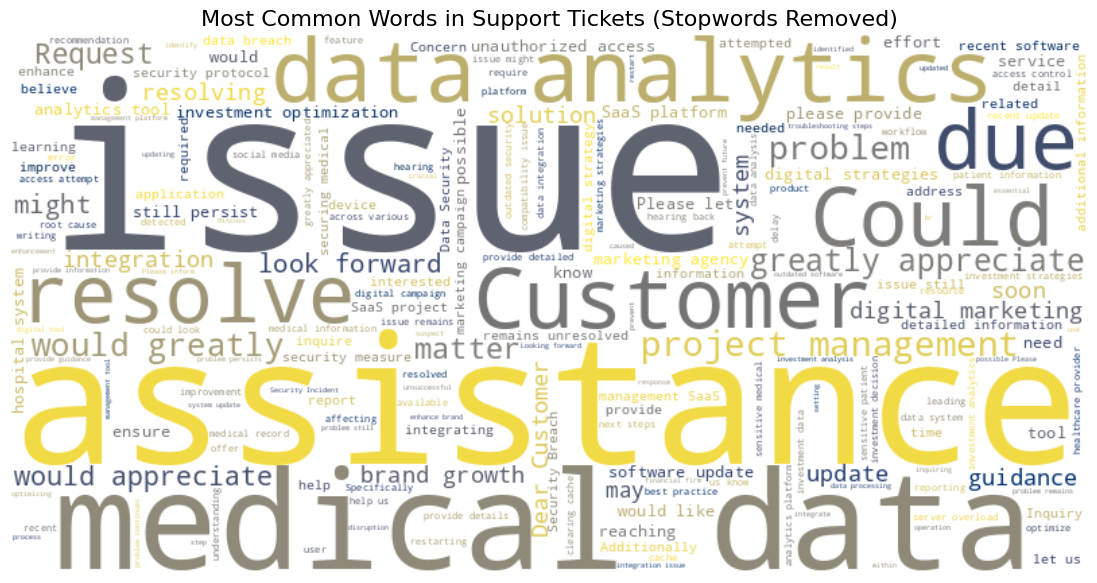

In [ ]:
# You may need to install the wordcloud library first:
# !pip install wordcloud


from wordcloud import WordCloud
from nltk.corpus import stopwords # Import the stopwords list
import nltk
nltk.download('stopwords')

# --- NEW: Load and customize stopwords ---

# Load the standard English stopwords
stop_words = set(stopwords.words('english'))

# Add custom words that are common in your dataset but not informative
# This is a crucial step to make your word cloud more meaningful
custom_stopwords = {'hi', 'hello', 'thanks', 'thank', 'regards', 'team', 'support'}
stop_words.update(custom_stopwords)

# --- End of new code ---


# Combine all ticket text into a single string
df['text'] = df['subject'].fillna('') + " " + df['body'].fillna('')
full_text = ' '.join(df['text'])

# Create the word cloud object, now with the stopwords parameter
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='cividis',
    stopwords=stop_words # Pass the stopword set here
).generate(full_text)

# Plot the WordCloud image
plt.figure(figsize=(14, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Support Tickets (Stopwords Removed)', fontsize=16)
plt.show()